In [1]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from analyser import *

con = psycopg2.connect("dbname=test1")

## Users selection
We distinguish users kind :
    
* "instructor"
* "administrator"
* "demo"

In [2]:
# subs = generate_submissions(users=10, pbls=100)
users = pd.read_sql_query("select user_id, creation_date from users \
                            where demo=0 and instructor=0 and administrator=0\
                            ", con=con)

lusers = users.user_id.tolist()
usersstr = str(lusers).strip('[]')

## Problems selection
We only analyse 'Pxxxxx' type problems

In [3]:
probs = pd.read_sql_query("select problem_nm from problems where problem_id like 'P%%'\
                          ", con=con)

# problem_id like 'P%%'

lprobs = [p[0] for p in probs.values if p[0]]
lprobsstr = str(lprobs).strip('[]')

## Sublissions selection

In [4]:
submissions = pd.read_sql_query("select submission_uid, user_id, problem_id, submission_id, \
                        state, time_out, time_in, veredict, score \
                        from submissions where user_id in (%s);" % (usersstr),
                                con=con)

# get rid of languages
submissions.problem_id = submissions.problem_id.apply(lambda x: x[:-3])
#submissions.set_index('submission_uid', inplace=True)

subs = submissions[submissions.problem_id.isin(lprobs)]

In [28]:
g = subs.veredict.value_counts(normalize=True)

<IPython.core.display.Javascript object>


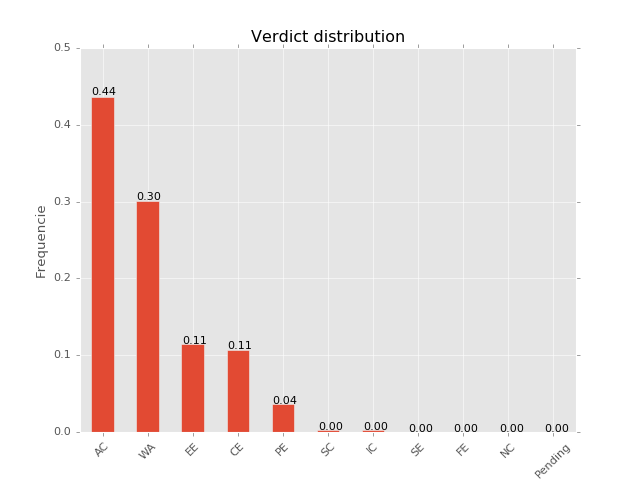

In [60]:
width = 0.35
ax = g.plot(kind='bar', rot=45)
for p in ax.patches:
    #ax.annotate(("%.2f" % p.get_height()), (p.get_x() , p.get_height()))
    ax.annotate(("%.2f" % p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


ax.set_ylim(0,0.5)
ax.set_ylabel('Frequencie')
ax.set_title('Verdict distribution')
plt.show()